In [1]:
import os , shutil
base_dir = "/home/shayan/Conda files/Deep learning/CNN cats vs dogs/"
original_dataset_dir = "/home/shayan/Conda files/Deep learning/Data"

In [2]:
train_dir= os.path.join(base_dir,'train')
# os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,'validation')
# os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')
# os.mkdir(test_dir)

In [3]:
train_cats_dir = os.path.join(train_dir,'cats')
# os.mkdir(train_cats_dir)

validation_cats_dir=os.path.join(validation_dir,'cats')
# os.mkdir(validation_cats_dir)

test_cats_dir = os.path.join(test_dir,'cat')
# os.mkdir(test_cats_dir)


In [4]:
train_dogs_dir = os.path.join(train_dir,'dogs')
# os.mkdir(train_dogs_dir)

validation_dogs_dir=os.path.join(validation_dir,'dogs')
# os.mkdir(validation_dogs_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
# os.mkdir(test_dogs_dir)


In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [5]:
print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total test cat images:',len(os.listdir(test_cats_dir)))
print('total validation cat images:',len(os.listdir(validation_cats_dir)))
print('total training dog images:',len(os.listdir(train_dogs_dir)))
print('total test dog images:',len(os.listdir(test_dogs_dir)))
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total test cat images: 500
total validation cat images: 500
total training dog images: 1000
total test dog images: 500
total validation dog images: 500


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [8]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch sahpe:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch sahpe: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 64s 639ms/step - loss: 0.6892 - acc: 0.5280 - val_loss: 0.6818 - val_acc: 0.5230
Epoch 2/30
100/100 [==============================] - 58s 580ms/step - loss: 0.6623 - acc: 0.6070 - val_loss: 0.6704 - val_acc: 0.5760
Epoch 3/30
100/100 [==============================] - 56s 563ms/step - loss: 0.6189 - acc: 0.6635 - val_loss: 0.6205 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 57s 570ms/step - loss: 0.5751 - acc: 0.6950 - val_loss: 0.6179 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 57s 570ms/step - loss: 0.5455 - acc: 0.7200 - val_loss: 0.6058 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 62s 616ms/step - loss: 0.5191 - acc: 0.7415 - val_loss: 0.5797 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 57s 572ms/step - loss: 0.4886 - acc: 0.7580 - val_loss: 0.53

In [12]:
model.save('cats_and_dogs_small_1.h5')

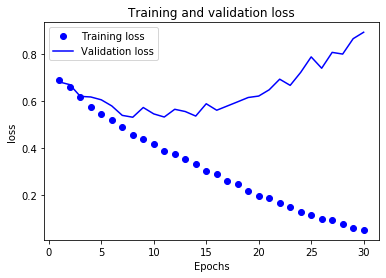

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
[u'acc', u'loss' , u'val_acc', u'val_loss']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs= range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo' , label='Training loss')
plt.plot(epochs, val_loss_values, 'b' , label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [21]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
 63/100 [=================>............] - 58s 920ms/step - loss: 0.6982 - acc: 0.5140 - val_loss: 0.6851 - val_acc: 0.5810
